In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.io
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.utils import shuffle
from scipy.misc import imread, imshow

import os

%matplotlib inline

## Part 1 - K-means Clustering

### 1.1 Implementing K-means

In [2]:
# Read the data
FOLDER = 'data'
FILE = 'ex7data2.mat'
path = os.path.join(FOLDER, FILE)

data = scipy.io.loadmat(path)
X = pd.DataFrame(data=data['X'],    # values
                 columns=['x' + str(i) for i in range(data['X'].shape[1])])  # column names
print("X is of dimensions {0}".format(X.shape))

X is of dimensions (300, 2)


#### 1.1.1 Finding closest centroids

For each example $i$ we set <br>
<center>$c^{(i)} := j$ that minimizes $\left \Vert x^{(i)} - \mu_j \right \Vert^2$,</center> <br>
where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ and $\mu_j$ is the position (value) of the $j$'th centroid.

In [3]:
class Kmeans:
    
    def __init__(self):
        pass
    
    def set_x(self, x):
        self.x_ = x
    
    def return_x(self):
        return self.x_
    
    def set_centroids(self, centroids):
        self.centroids_ = centroids
    
    def return_centroids(self):
        return self.centroids_
    
    def find_closest_centroids(self):
        dist = euclidean_distances(self.x_, self.centroids_)
        ind = np.argmin(dist, axis = 1)
        return ind

In [4]:
cls = Kmeans()
cls.set_x(X)
init_centroids = np.array([[3, 3], [6, 2], [8, 5]])
init_centroid_df = pd.DataFrame(data = init_centroids,
                                columns = ['x' + str(i) for i in range(init_centroids.shape[1])]                             
                               )
cls.set_centroids(init_centroid_df)


#### 1.1.2 Computing centroid means

For each centroid $k$, we set $$ \mu_k := \frac{1}{\vert C_k \vert} \sum_{i \in C_k} x^{(i)} $$ <br>
where $C_k$ is the set of examples that are assigned to centroid $k$. Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k = 2$, then you should update $\mu_2 = \frac{1}{2} (x^{(3)} + x^{(5)})$

In [5]:
cls.find_closest_centroids() == 0;

In [6]:
cls.return_centroids()

,x0,x1
0,3,3
1,6,2
2,8,5


In [7]:
def compute_centroid_means(self):
    means = list()
    for i in range(len(self.return_centroids())):
        mean = np.mean(self.return_x()[self.find_closest_centroids() == i], axis = 0)
        means.append(mean)
    means_array = np.vstack(means)
    return pd.DataFrame(data = means_array,
                        columns = ['x' + str(i) for i in range(self.return_centroids().shape[1])]
                       )

In [8]:
Kmeans.compute_centroid_means = compute_centroid_means

In [9]:
cls.compute_centroid_means()

,x0,x1
0,2.428301,3.157924
1,5.813503,2.633656
2,7.119387,3.616684


### 1.2 K-means on example dataset

In [10]:
def run_kmeans(self, iters, plot = False):
    iterations = [self.return_centroids()]
    for i in range(iters):
        new_means = self.compute_centroid_means()
        iterations.append(new_means)
        self.set_centroids(new_means)
    centroids_df = pd.concat(iterations, keys = [ind for ind, _ in enumerate(iterations)])
    return centroids_df

Kmeans.run_kmeans = run_kmeans

In [11]:
cls.set_x(X)
cls.set_centroids(init_centroid_df)
iterations = cls.run_kmeans(5)
iterations

x0        x1
0 0  3.000000  3.000000
  1  6.000000  2.000000
  2  8.000000  5.000000
1 0  2.428301  3.157924
  1  5.813503  2.633656
  2  7.119387  3.616684
2 0  2.313255  3.228306
  1  5.332738  2.431596
  2  6.865362  3.232940
3 0  2.196925  3.421367
  1  4.835554  2.129767
  2  6.656005  3.075135
4 0  1.982412  4.025078
  1  3.911508  1.470605
  2  6.340086  3.053666
5 0  1.953995  5.025570
  1  3.126637  1.112171
  2  6.129195  3.016063

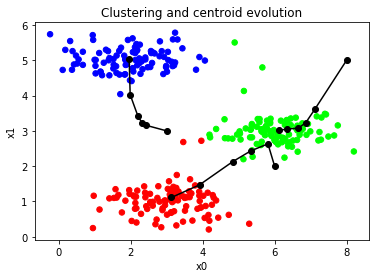

In [12]:
plt.scatter(X['x0'],X['x1'],
            s = 30,
            c = cls.find_closest_centroids(),
            cmap = plt.cm.brg) # scatter plot with the clusters
# Plot how each centroid moved during training
for i in range(iterations.loc[(0),:].shape[0]):
    plt.plot(iterations.loc[(slice(None),i),:]['x0'],
             iterations.loc[(slice(None),i),:]['x1'],
             marker = 'o',
             color = 'black'
            )
plt.ylabel('x1')
plt.xlabel('x0')
plt.title('Clustering and centroid evolution')
plt.show()

### 1.3 Random Initialization

In [13]:
def random_initialization(self, k):
    self.centroids_ = shuffle(self.x_).iloc[:k].reset_index(drop=True)
    return self.return_centroids()
    
Kmeans.random_initialization = random_initialization    

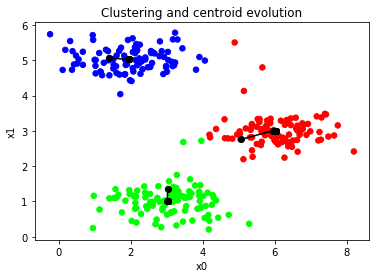

In [14]:
k = 3
cls = Kmeans()
cls.set_x(X)
cls.random_initialization(k)
iterations = cls.run_kmeans(10)

# scatter plot with the clusters
plt.scatter(X['x0'],X['x1'],
            s = 30,
            c = cls.find_closest_centroids(),
            cmap = plt.cm.brg) 

# Plot how each centroid moved during training
for i in range(iterations.loc[(0),:].shape[0]):
    plt.plot(iterations.loc[(slice(None),i),:]['x0'],
             iterations.loc[(slice(None),i),:]['x1'],
             marker = 'o',
             color = 'black'
            )
plt.ylabel('x1')
plt.xlabel('x0')
plt.title('Clustering and centroid evolution')
plt.show()

### 1.4 Image compression with K-means

The number of colors in the image will be reduced to 16.

#### 1.4.1 K-means on pixels

/home/theopanag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


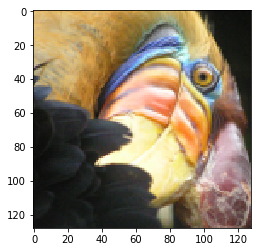

In [15]:
FILE = 'bird_small.png'

image = os.path.join(FOLDER, FILE)
image_data = imread(image, mode = 'RGB')
plt.imshow(image_data);

In [16]:
image_data.shape

(128, 128, 3)

In [17]:
image_data_flat = image_data.reshape([-1,3])
image_data_flat_df = pd.DataFrame(data = image_data_flat,
                                  columns = ['x' + str(i) for i in range(image_data_flat.shape[1])]                             
                                 )

In [18]:
cls.set_x(image_data_flat_df)
cls.return_x()
cls.random_initialization(k).head()

,x0,x1,x2
0,140,126,129
1,184,149,69
2,213,183,118


In [19]:
cls.compute_centroid_means().head()

,x0,x1,x2
0,66.803910,62.423950,60.456651
1,177.284378,129.909276,63.102116
2,226.481530,200.101069,154.014063


In [20]:
k = 16
cls = Kmeans()
cls.set_x(image_data_flat_df)
cls.random_initialization(k)
iterations = cls.run_kmeans(100)

In [21]:
cls.find_closest_centroids()

array([13, 13, 13, ...,  4,  4,  4])

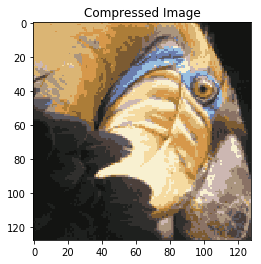

In [22]:
image_data_reduced_df = cls.return_centroids().loc[cls.find_closest_centroids()]
image_data_reduced = image_data_reduced_df.values.reshape([128,128,3]).astype('uint8')
plt.imshow(image_data_reduced)
plt.title('Compressed Image')
plt.show();

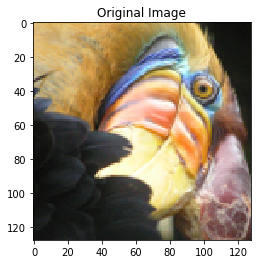

In [23]:
plt.imshow(image_data_flat_df.values.reshape([128,128,3]))
plt.title('Original Image')
plt.show()

## Part 2 - Principal Components Analysis

### 2.1 Example Dataset

In [24]:
# Read the data
FILE = 'ex7data1.mat'

path_pca = os.path.join(FOLDER, FILE)

data_pca = scipy.io.loadmat(path_pca)
X_pca = pd.DataFrame(data=data_pca['X'],    # values
                 columns=['x' + str(i) for i in range(data_pca['X'].shape[1])])  # column names
print("X is of dimensions {0}".format(X_pca.shape))

X is of dimensions (50, 2)


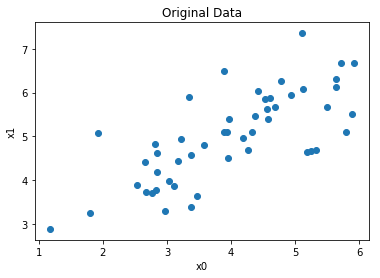

In [25]:
plt.scatter(X_pca['x0'],
            X_pca['x1'])
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

### 2.2 Implementing PCA

In [26]:
class Pca:
    
    def __init__(self):
        pass
    
    def set_x(self, x):
        self.x_ = x
        
    def return_x(self):
        return self.x_
    
    def x_normalize(self):
        self.x_ = (self.x_ - self.x_.mean()) / self.x_.std()
        
    def x_covariance(self):
        self.cov_ = self.x_.cov()
        return self.cov_
    
    def apply_svd(self):
        u,s,v = np.linalg.svd(self.cov_)
        return u,s,v

In [27]:
pca = Pca()
pca.set_x(X_pca)
pca.x_normalize()
x_pca_norm = pca.return_x()
cov = pca.x_covariance()
u,s,v = pca.apply_svd()
u

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

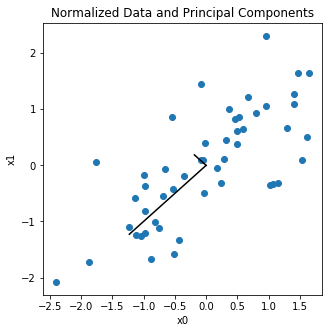

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(x_pca_norm['x0'],
            x_pca_norm['x1'])
plt.plot([0,u[0,0]*s[0]], [0,u[1,0]*s[0]], 'k')
plt.plot([0,u[0,1]*s[1]], [0,u[1,1]*s[1]], 'k')
#plt.plot()
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Normalized Data and Principal Components')

plt.show()

### 2.3 Dimensionality Reduction with PCA

#### 2.3.1 Projecting the data onto the principal components

In [29]:
def project_x(self, k):
    u,s,v = self.apply_svd()
    z = np.dot(self.x_, u[:,:k])
    return z

Pca.project_x = project_x

In [30]:
x_pca_proj = pca.project_x(1)
x_pca_proj[:5,]

array([[ 1.48127391],
       [-0.91291229],
       [ 1.21208656],
       [ 1.62734009],
       [ 1.26042409]])

#### 2.3.2 Reconstructing an approximation of the data

In [31]:
def reconstruct_x(self, k):
    u,s,v = self.apply_svd()
    z = self.project_x(k)
    x_recon = np.dot(z, u[:,:k].T)
    return pd.DataFrame(data = x_recon, columns = ['x'+str(i) for i in range(x_recon.shape[1])])

Pca.reconstruct_x = reconstruct_x

In [32]:
x_recon = pca.reconstruct_x(1)

#### 2.3.3 Visualizing the projections

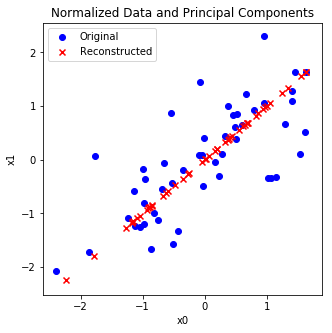

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(x_pca_norm['x0'],
            x_pca_norm['x1'],
            c = 'b',
            label = 'Original'
           )
plt.scatter(x_recon['x0'],
            x_recon['x1'],
            c = 'r',
            marker = 'x',
            label = 'Reconstructed'
           )
#plt.plot()
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Normalized Data and Principal Components')
plt.legend()

plt.show()

### 2.4 Face Image Dataset

In [34]:
# Read the data
FILE = 'ex7faces.mat'
path = os.path.join(FOLDER, FILE)

data = scipy.io.loadmat(path)
X_faces = pd.DataFrame(data=data['X'],    # values
                 columns=['x' + str(i) for i in range(data['X'].shape[1])])  # column names
print("X_faces is of dimensions {0}".format(X_faces.shape))

X_faces is of dimensions (5000, 1024)


In [35]:
X_faces.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x1014,x1015,x1016,x1017,x1018,x1019,x1020,x1021,x1022,x1023
0,-37.866314,-45.866314,-53.866314,-51.866314,-40.866314,-33.866314,-47.866314,-37.866314,-22.866314,-7.866314,...,-91.866314,-113.866314,-123.866314,-102.866314,-84.866314,-94.866314,-99.866314,-110.866314,-111.866314,-99.866314
1,8.133686,-0.866314,-8.866314,-15.866314,-17.866314,-16.866314,-15.866314,-21.866314,-42.866314,-28.866314,...,-47.866314,-54.866314,-54.866314,-59.866314,-74.866314,-86.866314,-70.866314,-34.866314,-8.866314,0.133686
2,-32.866314,-34.866314,-36.866314,-18.866314,6.133686,15.133686,-1.866314,-31.866314,-1.866314,13.133686,...,-36.866314,-41.866314,-46.866314,-51.866314,-73.866314,-96.866314,-105.866314,-110.866314,-111.866314,-111.866314
3,-84.866314,-64.866314,-47.866314,-42.866314,-38.866314,-28.866314,-17.866314,-11.866314,-10.866314,-12.866314,...,-37.866314,-38.866314,-41.866314,-45.866314,-48.866314,-55.866314,-56.866314,-56.866314,-57.866314,-53.866314
4,2.133686,6.133686,5.133686,9.133686,10.133686,11.133686,11.133686,11.133686,12.133686,12.133686,...,-42.866314,-59.866314,-72.866314,-70.866314,-68.866314,-56.866314,-30.866314,-9.866314,0.133686,-14.866314


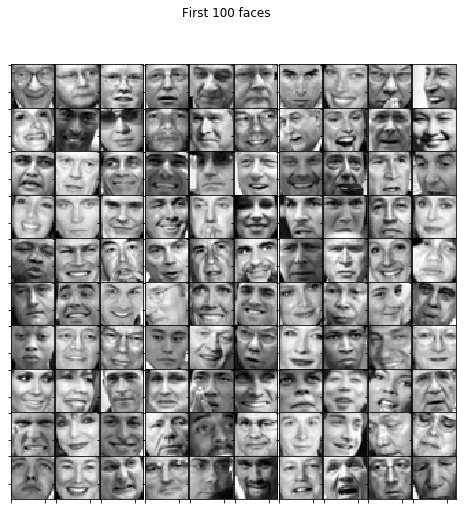

In [36]:
images = 100
cols = 10
fig = plt.figure(figsize = (8,8))

for i in range(images):
    a = fig.add_subplot(cols, np.ceil(images/float(cols)), i + 1)
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.grid(False)
    plt.imshow(X_faces.loc[i].values.reshape(32,32).T,
               cmap='gray',
               interpolation='none')
plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle('First 100 faces')
plt.show()

#### 2.4.1 PCA on Faces

In [37]:
pca_faces = Pca()
pca_faces.set_x(X_faces)
pca_faces.x_normalize()
x_faces_norm = pca_faces.return_x()
pca_faces.x_covariance()
u,s,v = pca_faces.apply_svd()

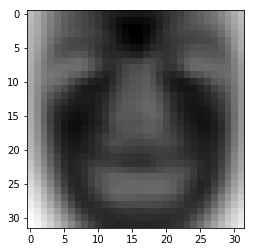

In [38]:
# Visualize first principal components
plt.imshow(u[:,0].reshape(32,32).T,
           cmap='gray',
           interpolation='none')

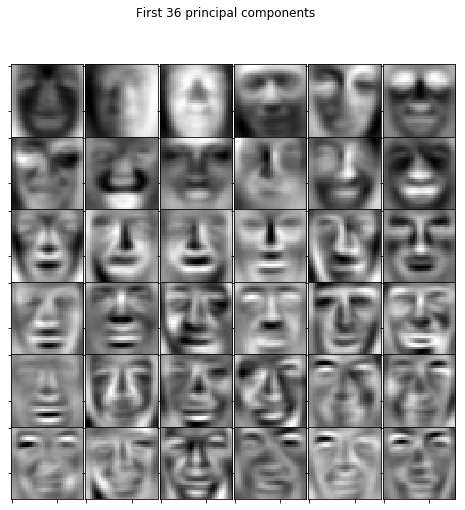

In [39]:
images = 36
cols = 6
fig = plt.figure(figsize = (8,8))

for i in range(images):
    a = fig.add_subplot(cols, np.ceil(images/float(cols)), i + 1)
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.grid(False)
    plt.imshow(u[:,i].reshape(32,32).T,
               cmap='gray',
               interpolation='none')
plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle('First 36 principal components')
plt.show()

#### 2.4.2 Dimensionality Reduction

In [40]:
x_faces_project = pca_faces.project_x(100)

In [41]:
x_faces_reconstruct = pca_faces.reconstruct_x(100)

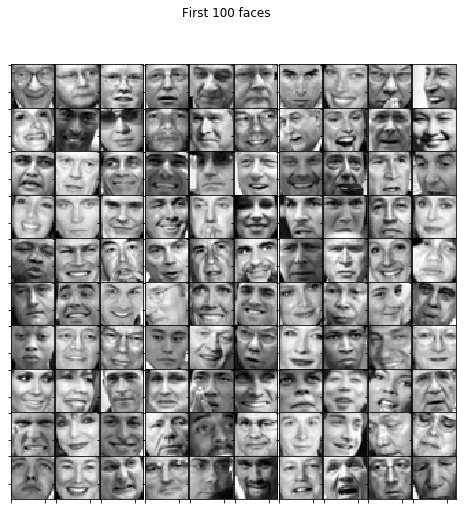

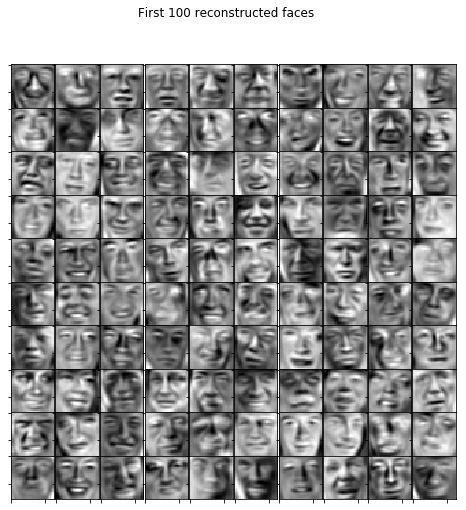

In [42]:
images = 100
cols = 10
fig = plt.figure(figsize = (8,8))

# Original images (first 100)
for i in range(images):
    a = fig.add_subplot(cols, np.ceil(images/float(cols)), i + 1)
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.grid(False)
    plt.imshow(X_faces.loc[i].values.reshape(32,32).T,
               cmap='gray',
               interpolation='none')
plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle('First 100 faces')
plt.show()


fig = plt.figure(figsize = (8,8))

# Reconstructed images (first 100 using 36 principal components)
for i in range(images):
    a = fig.add_subplot(cols, np.ceil(images/float(cols)), i + 1)
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.grid(False)
    plt.imshow(x_faces_reconstruct.loc[i].values.reshape(32,32).T,
               cmap='gray',
               interpolation='none')
plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle('First 100 reconstructed faces')
plt.show()